# Содержание

[Раздел 2. Загрузка и предобработка данных](#part2)  
&emsp;[2.1 Загрузка и просмотр данных](#part2.1)  
&emsp;[2.2 Преобразование типов данных](#part2.2)  
[Раздел 3. Изучение данных](#part3)   
&emsp;[3.1 Работа с пропусками](#part3.1)   
&emsp;[3.2 Работа с выбросами](#part3.2)  
&emsp;&emsp;[3.2.1 Поиск ошибок и погодных аномалий](#part3.2.1)  
&emsp;&emsp;[3.2.2 Данные по загрязнителям](#part3.2.2)   
&emsp;[3.3 Исследование целевого параметра AQI](#part3.3)  
&emsp;&emsp;[3.3.1 Влияние погодных аномалий](#part3.3.1)  
&emsp;&emsp;[3.3.2 Влияние Covid-19](#part3.3.2)      
&emsp;&emsp;[3.3.3 Корреляция признаков между собой и с целевым параметром](#part3.3.3)       
[Раздел 4. Выявление погодных факторов, наиболее влияющих на AQI](#part4)  
&emsp;[4.1 Отбор признаков по f-регрессии](#part4.1)  
&emsp;[4.2 Отбор признаков по методу Лассо](#part4.2)     
[Раздел 5.Построение прогнозной модели AQI](#part5)  
&emsp;[5.1 Модель линейной регресиии](#part5.1)  
&emsp;[5.2 Кросс-валидация](#part5.2)  
&emsp;[5.3 "Случайный лес" регрессия](#part5.3)  
&emsp;[5.4 "Случайный лес" классификация](#part5.4)  
&emsp;[5.5 Модель классификации К-средних](#part5.5)    
&emsp;[5.6 Настройка гиперпараметров для "Случайного леса"](#part5.6) 
     

-------------------------
запуск презентации - сделать потом для удобства представления результатов! 


Режим презентации jupyter nbconvert my_script.ipynb --to slides --post serve

https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67

In [1]:
# PORT = 15200
# !jupyter nbconvert diploma.ipynb --to slides --post serve

In [2]:
# !jupyter nbconvert r'https://raw.githubusercontent.com/petrovalina93/diploma/main/diploma.ipynb' --to slides --post serve

-------------------------

## Раздел 2. Загрузка и предобработка данных <a id='part2'></a>


### 2.1 Загрузка и просмотр данных  <a id='part2.1'></a>

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df1 = pd.read_csv('https://raw.githubusercontent.com/petrovalina93/diploma/main/Shanghai_AQI_and_Wheather_2014-2021.csv')
df1.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous


In [6]:
df2 = pd.read_csv('https://raw.githubusercontent.com/petrovalina93/diploma/ec207d16b85eaa378e902aa7acecdef70aedafbf/shanghai-air-quality.csv')
df2.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/1/5,76,43,28,13,1,6
1,2021/1/6,98,41,23,15,2,7
2,2021/1/7,101,60,20,9,2,7
3,2021/1/8,81,46,19,13,3,9
4,2021/1/9,80,57,20,24,4,10


In [7]:
# посмотрим состав и типы данных датасета

In [8]:
df1.columns

Index(['date', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'AQI', 'AQI_Explained'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2502 non-null   object 
 1   maxtempC           2502 non-null   float64
 2   mintempC           2502 non-null   float64
 3   totalSnow_cm       2502 non-null   float64
 4   sunHour            2502 non-null   float64
 5   uvIndex            2502 non-null   float64
 6   moon_illumination  2502 non-null   float64
 7   DewPointC          2502 non-null   float64
 8   FeelsLikeC         2502 non-null   float64
 9   HeatIndexC         2502 non-null   float64
 10  WindChillC         2502 non-null   float64
 11  WindGustKmph       2502 non-null   float64
 12  cloudcover         2502 non-null   float64
 13  humidity           2502 non-null   float64
 14  precipMM           2502 non-null   float64
 15  pressure           2502 non-null   float64
 16  tempC              2502 

In [10]:
# в 1ом датасете нет пустых значений
# тип данных необходимо скорректировать для удобства дальнейшей работы

In [11]:
df2

,date,pm25,pm10,o3,no2,so2,co
0,2021/1/5,76,43,28,13,1,6
1,2021/1/6,98,41,23,15,2,7
2,2021/1/7,101,60,20,9,2,7
3,2021/1/8,81,46,19,13,3,9
4,2021/1/9,80,57,20,24,4,10
...,...,...,...,...,...,...,...
2498,2019/1/1,,34,26,13,4,3
2499,2017/9/10,,26,33,16,3,9
2500,2016/3/14,,61,51,13,8,7
2501,2015/1/1,,55,24,19,15,6


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2503 non-null   object
 1    pm25   2503 non-null   object
 2    pm10   2503 non-null   object
 3    o3     2503 non-null   object
 4    no2    2503 non-null   object
 5    so2    2503 non-null   object
 6    co     2503 non-null   object
dtypes: object(7)
memory usage: 137.0+ KB


In [13]:
# пропусков судя по результату нет, но визуально видим их в конце датасета,
# необходимо скорректировать формат пропущенных значений для корректной выгрузки и формат дат для удобства 

In [14]:
# также во втором датасете строк на одну больше, посмотрим какая дата лишняя

In [15]:
df_ = df1.merge(df2, how='outer', on='date')
df_.iloc[-1]['date']

'2014/1/1'

In [16]:
# вывод - данных по крайней дате - 2021-01-31 нет в первом датасете

### 2.2 Преобразование типов данных  <a id='part2.2'></a>

In [17]:
# даты приведем к формату datetime 

In [18]:
type(df1.date[0])

str

In [19]:
import datetime

In [20]:
df1['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in list(df1['date'])]

In [21]:
df2['date'] = [datetime.datetime.strptime(date, '%Y/%m/%d') for date in list(df2['date'])]

In [22]:
#  поменяем формат столбцов с целочисленными значениями с float на int. 
# предварительно проверим по столбцам списки уникальных значений, чтобы убедится,что нет вещественных значений

In [23]:
df1['windspeedKmph'].unique() 

array([12., 14.,  6., 19., 15., 23., 16., 11.,  9.,  7., 18., 20., 22.,
       13., 21., 17., 25., 10., 24.,  8., 26.,  5.,  4., 27., 28., 33.,
       51.,  3., 29., 30., 40., 32.])

In [24]:
df1[['maxtempC', 'mintempC', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC','WindChillC',\
     'WindGustKmph', 'cloudcover', 'humidity', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'AQI']] =\
    df1[['maxtempC', 'mintempC', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC','WindChillC',\
         'WindGustKmph', 'cloudcover', 'humidity', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'AQI']]\
.astype(int)
df1.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15,5,0.0,8.7,4,0,-1,11,12,...,0,43,0.0,1021.0,15,10,242,12,319,Hazardous
1,2014-01-02,14,7,0.0,8.7,4,2,4,11,13,...,3,60,0.0,1019.0,14,10,141,14,352,Hazardous
2,2014-01-03,16,9,0.0,8.7,4,10,3,11,12,...,26,55,0.0,1017.0,16,10,295,14,338,Hazardous
3,2014-01-04,10,4,0.0,5.5,2,17,3,7,9,...,24,68,0.1,1022.0,10,10,169,14,355,Hazardous
4,2014-01-05,10,3,0.0,8.7,3,24,3,9,9,...,12,66,0.0,1024.0,10,10,117,6,343,Hazardous


In [25]:
df2.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [26]:
# попробуем привести столбцы второго датафрейма к числовому формату
# df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(int)

In [27]:
# ловим ошибку, т.к. есть пустые строки вместо значений !

In [28]:
df2.loc[(df2[' pm25'] == ' ') | (df2[' pm10'] == ' ') | (df2[' o3'] == ' ') | (df2[' no2'] == ' ')\
        | (df2[' so2'] == ' ') | (df2[' co'] == ' ')]

,date,pm25,pm10,o3,no2,so2,co
26,2021-01-31,69,,,,,
100,2020-12-14,192,21,21,11,,7
243,2020-04-30,111,53,,23,3,6
244,2020-05-01,116,38,,13,2,5
245,2020-05-02,98,60,,26,2,8
...,...,...,...,...,...,...,...
2498,2019-01-01,,34,26,13,4,3
2499,2017-09-10,,26,33,16,3,9
2500,2016-03-14,,61,51,13,8,7
2501,2015-01-01,,55,24,19,15,6


In [29]:
# таких строк всего 118, заменим все подобные значения на пустые , а затем переведем столбцы в float 
# ( т.к. NaN не конвертируетс в int)

In [30]:
df2 = df2.replace({' pm25':{' ': np.nan}, ' pm10':{' ': np.nan}, ' o3':{' ': np.nan}, ' no2':{' ': np.nan}, ' so2':{' ': np.nan}, ' co':{' ': np.nan}})

In [31]:
df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(float)
df2

,date,pm25,pm10,o3,no2,so2,co
0,2021-01-05,76.0,43.0,28.0,13.0,1.0,6.0
1,2021-01-06,98.0,41.0,23.0,15.0,2.0,7.0
2,2021-01-07,101.0,60.0,20.0,9.0,2.0,7.0
3,2021-01-08,81.0,46.0,19.0,13.0,3.0,9.0
4,2021-01-09,80.0,57.0,20.0,24.0,4.0,10.0
...,...,...,...,...,...,...,...
2498,2019-01-01,NaN,34.0,26.0,13.0,4.0,3.0
2499,2017-09-10,NaN,26.0,33.0,16.0,3.0,9.0
2500,2016-03-14,NaN,61.0,51.0,13.0,8.0,7.0
2501,2015-01-01,NaN,55.0,24.0,19.0,15.0,6.0


теперь выдача корректна  
 можем приступить к анализу данных

## Раздел 3. Изучение данных <a id='part3'></a>


### 3.1 Работа с пропусками <a id='part3.1'></a>   

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# df1.info() показала, что пустых значений нет, но возможно имеются пропущенные даты самих измерений
# посмотрим график колебания температур во времени на предмет наличия аномальных зон

<AxesSubplot:xlabel='date', ylabel='maxtempC'>

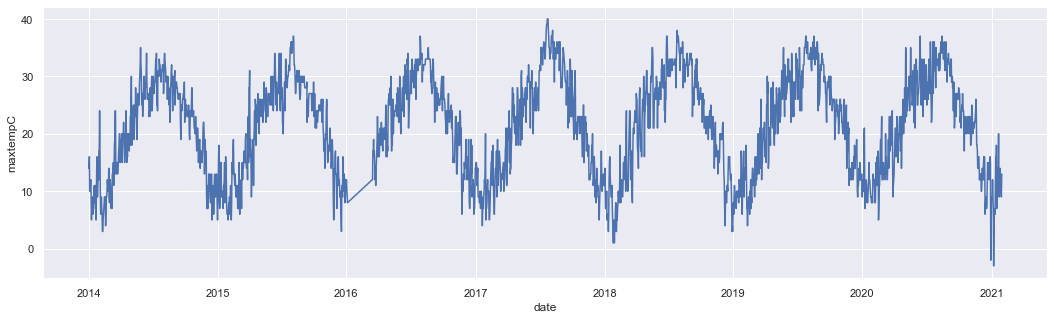

In [34]:
sns.set(rc={'figure.figsize':(18,5)})
sns.lineplot(x=df1.date, y=df1.maxtempC)

In [35]:
# можно отметить пик летних температур в 2017 году и в целом довольно жаркий летний сезон всех последующих лет,
# также особенно холодную зиму 2021 года

# в начале 2016 года есть непонятный линейный участок, посмотрим эти данные отдельно

In [36]:
df1 [(df1 ['date'] < '2016-03-20') & ('2016-01-01'< df1['date'])].sort_values(by='date')

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
727,2016-01-04,8,4,0.0,5.5,2,28,0,4,7,...,59,66,0.2,1026.0,8,10,177,14,358,Hazardous
728,2016-03-14,12,4,0.0,10.2,2,36,3,6,9,...,26,70,0.0,1026.0,12,10,114,16,314,Hazardous
729,2016-03-15,12,3,0.0,10.2,2,44,2,6,9,...,41,64,0.0,1022.0,12,10,105,15,320,Hazardous
730,2016-03-16,17,9,0.0,11.6,4,51,7,12,13,...,18,69,0.0,1019.0,17,10,123,11,273,Very unhealthy
731,2016-03-17,17,9,0.0,7.4,3,58,12,13,14,...,63,89,0.1,1016.0,17,8,124,14,290,Very unhealthy
732,2016-03-18,19,13,0.0,6.0,4,65,14,16,16,...,89,86,0.0,1012.0,19,8,177,6,270,Very unhealthy
733,2016-03-19,16,9,0.0,10.3,3,73,11,13,13,...,68,88,0.2,1018.0,16,7,49,10,334,Hazardous


In [37]:
# видим пропуск в датах , данных за 10 недельс 5 янв. по 13 марта 2016 нет

In [38]:
datetime.datetime.strptime('2016-03-13', '%Y-%m-%d') - datetime.datetime.strptime('2016-01-04', '%Y-%m-%d') \
+ datetime.timedelta(days=1)

datetime.timedelta(days=70)

In [39]:
# в этом интервале пропущено 70 дней, попробуем поискать ещё

In [40]:
timedelta = pd.date_range(min(df1['date']),max(df1['date']))
print('Промежуток между мин. и макс. датами - ', len(timedelta))
print( 'Всего строк-', len(df1))
print( 'Всего пропущено, дн.-', (len(timedelta)-len(df1)))

Промежуток между мин. и макс. датами -  2587
Всего строк- 2502
Всего пропущено, дн.- 85


In [41]:
# также видим ещё пропуски дат, искуственно пока заполнять их не будем, т.к. много данных этого периода по другим годам 
# возможно попробуем сделать на этапе моделирования, при необходимости повышения точности модели. 
# пока просто зафиксируем список пропусков

In [42]:
missing_dates = pd.concat([df1['date'],pd.Series(timedelta)]).drop_duplicates(keep=False)
missing_dates

298    2014-10-26
363    2014-12-30
364    2014-12-31
662    2015-10-25
731    2016-01-02
          ...    
1761   2018-10-28
2125   2019-10-27
2190   2019-12-31
2280   2020-03-30
2489   2020-10-25
Length: 85, dtype: datetime64[ns]

In [43]:
# посмотрим тогда и по второму датасету с измерениями загрязнителей какие даты пропущены

In [44]:
timedelta2 = pd.date_range(min(df2['date']),max(df2['date']))
print( 'Всего пропущено, дн.-', (len(timedelta2)-len(df2)))

Всего пропущено, дн.- 85


In [45]:
missing_dates2 = pd.concat([df2['date'],pd.Series(timedelta2)]).drop_duplicates(keep=False)

In [46]:
len(pd.concat([missing_dates2, missing_dates]).drop_duplicates(keep=False))


0

In [47]:
# ВЫВОД - измерений по загрязненим нет по тем же датам, что и данных о погодных показателях

In [48]:
# во втором датасете после преобразования типов явно видим пропущенные значения

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2503 non-null   datetime64[ns]
 1    pm25   2496 non-null   float64       
 2    pm10   2495 non-null   float64       
 3    o3     2398 non-null   float64       
 4    no2    2496 non-null   float64       
 5    so2    2489 non-null   float64       
 6    co     2495 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 137.0 KB


In [50]:
df2.isnull().sum()

date       0
 pm25      7
 pm10      8
 o3      105
 no2       7
 so2      14
 co        8
dtype: int64

 в нашей задаче этот датасет является вспомогательным - т.к. данные из него используются для подчсета частных индексов AQI 
по каждому загрязнителю и определения итогового AQI по наибольшему из них.  А рассчитанный итоговый AQI уже занесен в первый датасет с погодными условиями. 
Т.е. наличие пропусков говорит о том, что в ряде дат AQI вычислен не по фактическим данным некоторых признаков, а по 
заполненным одним из методов.
В общем случае не имея рассчитанного AQI пропуски в таких данных придется заполнять самим, попробуем один из алгоритмов в учебных целях

In [51]:
# не будем использовать среднее значение столбца,потому что значения слишком сильно меняются в течение года и 
# не подходят для заполнения данных.  возьмем интервал в одну неделю

In [52]:
for k in range(2):
    for col in [' pm25', ' pm10', ' o3', ' no2',  ' so2', ' co']:
        for i in range(len(df2[col])):
            if np.isnan (df2[col][i]):
                df2[col][i] = (np.average(df2[col][i+1:i+3]) + np.average(df2[col][i-3:i-1]))/2

<ipython-input-52-365470022647>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col][i] = (np.average(df2[col][i+1:i+3]) + np.average(df2[col][i-3:i-1]))/2
C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
df2.isnull().sum()

date      0
 pm25     7
 pm10     0
 o3      98
 no2      0
 so2      0
 co       0
dtype: int64

In [54]:
# остался большой разрыв в данных измерений o3, далее будем использовать простой ввод из Sklearn -SimpleImputer.
# назначаем стратегию «среднего» для замены отсутствующих значений из набора данных.
# https://pythonpip.ru/osnovy/modul-simpleimputer-v-python

In [55]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(df2.iloc[:,1:])
df2.iloc[:,1:] = imp_mean.transform(df2.iloc[:,1:])
df2.isnull().sum()

date     0
 pm25    0
 pm10    0
 o3      0
 no2     0
 so2     0
 co      0
dtype: int64

пропуски в исходных данных по измереничм полностью заполнены

### 3.2 Работа с выбросами <a id='part3.2'></a>  

Проанализируем основной датасет с погодными характеристиками, выделив экстремальные значения.
далее посмотрим вспомогательный датасет с данными загрязнителей  и посмотрим насколько связаны их максимальные значения  с редкими погодными условиями 

### 3.2.1 Поиск ошибок и погодных аномалий <a id='part3.2.1'></a>  

In [56]:
# выведем базовые статистики

In [57]:
df1.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000
mean,21.445643,15.049161,0.001679,9.620064,4.693845,46.268985,12.917666,19.448441,20.195843,18.068745,17.294964,46.630695,71.049960,1.838849,1016.412070,21.445643,9.539568,153.968425,12.639888,236.598721
std,8.507496,8.045625,0.040454,3.129641,1.739478,31.279000,8.897817,10.480134,9.673024,8.793790,6.671845,30.686734,13.363236,6.081774,8.930989,8.507496,1.296442,75.989626,4.497569,77.295047
min,-3.000000,-6.000000,0.000000,3.800000,1.000000,0.000000,-23.000000,-9.000000,-3.000000,-9.000000,4.000000,0.000000,18.000000,0.000000,986.000000,-3.000000,3.000000,8.000000,3.000000,95.000000
25%,14.000000,8.000000,0.000000,8.000000,3.000000,19.000000,6.000000,11.000000,12.000000,11.000000,13.000000,19.000000,63.000000,0.000000,1009.000000,14.000000,9.000000,99.000000,10.000000,162.000000
50%,23.000000,16.000000,0.000000,9.000000,5.000000,46.000000,13.000000,20.000000,20.000000,20.000000,16.000000,44.000000,73.000000,0.000000,1016.000000,23.000000,10.000000,144.000000,12.000000,237.000000
75%,28.000000,22.000000,0.000000,12.700000,6.000000,73.000000,21.000000,27.000000,27.000000,25.000000,21.000000,73.000000,81.000000,1.100000,1023.750000,28.000000,10.000000,201.000000,15.000000,310.000000
max,40.000000,31.000000,1.700000,14.500000,9.000000,100.000000,28.000000,45.000000,45.000000,36.000000,82.000000,100.000000,97.000000,126.800000,1039.000000,40.000000,20.000000,347.000000,51.000000,522.000000


In [58]:
# видим, что столбец tempC дублирует maxtempC - исключим

In [59]:
df1 = df1.drop('tempC', axis=1)

In [60]:
# посмотроим визуализацию разброса значений аргументов на "ящиках с усами", проанализируем выбросы

<AxesSubplot:>

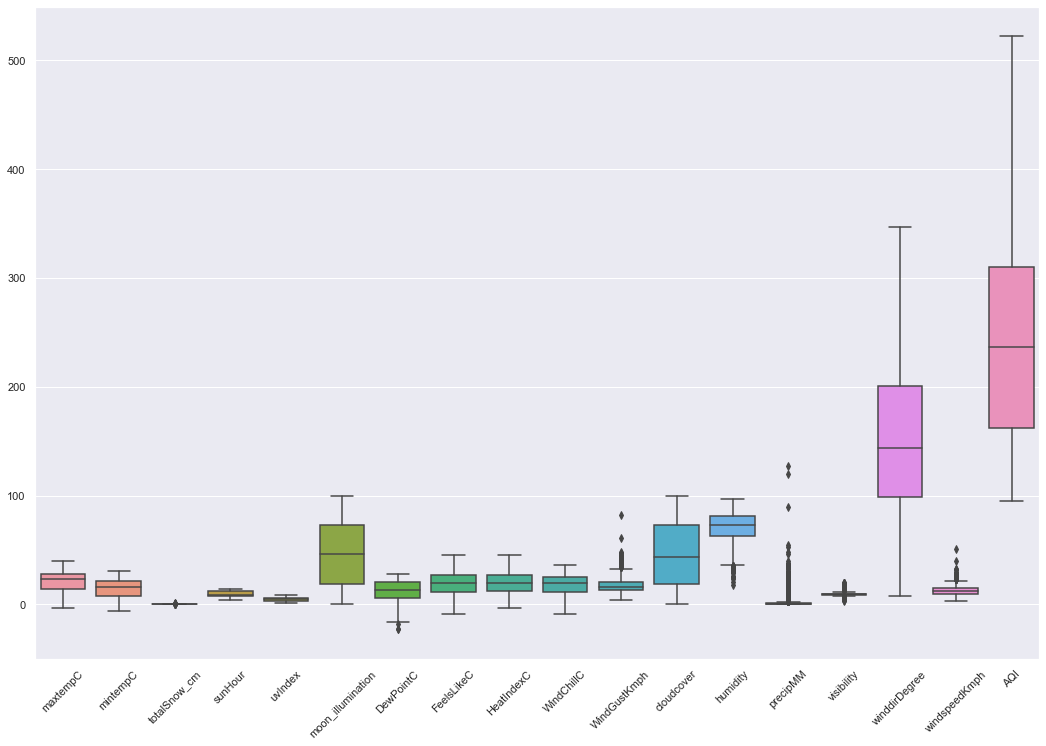

In [61]:
sns.set(rc={'figure.figsize':(18,12)})
plt.xticks(rotation=45)
sns.boxplot(data = df1.drop('pressure', axis=1)) # выносим давление отдельно, т.к. значения на два порядка больше 

<AxesSubplot:>

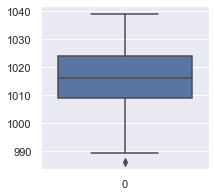

In [62]:
sns.set(rc={'figure.figsize':(3,3)})
sns.boxplot(data = df1['pressure'])

In [63]:
#  видим, что дней с большим количеством осадкаов мало, а снежных - крайне мало, но сами значения адекватные - ошибок нет

In [64]:
sns.set(rc={'figure.figsize':(5,5)})

<AxesSubplot:>

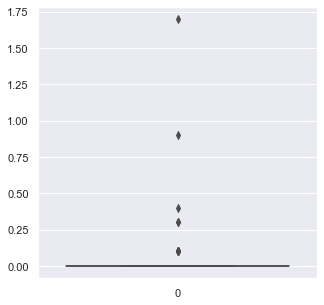

In [65]:
sns.boxplot(data = df1['totalSnow_cm'])

In [66]:
df1['totalSnow_cm'].quantile(0.995)

0.0

<AxesSubplot:>

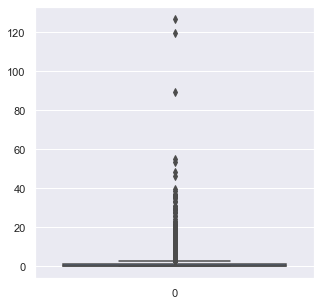

In [67]:
sns.boxplot(data = df1['precipMM'])

In [68]:
df1['precipMM'].quantile(0.99)

26.987999999999737

In [69]:
# сильные ветер и мощные порывы ветра также редки, значения адекватные - ошибок нет
# внешний вид диаграм очень схож, поэтому столбец с порывами WindGust можем исключить 
# как дублирующий скорость ветра, но более "размазанный", 

<AxesSubplot:>

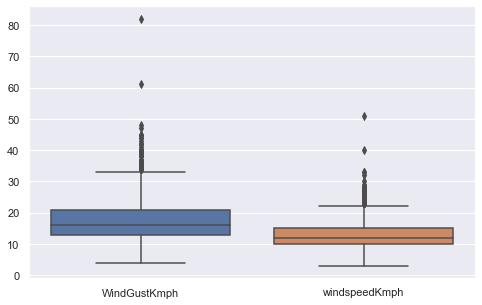

In [70]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(data = df1[['WindGustKmph', 'windspeedKmph']])

In [71]:
df1[['WindGustKmph','windspeedKmph']].quantile(0.99)

WindGustKmph     37.99
windspeedKmph    26.00
Name: 0.99, dtype: float64

In [72]:
df1 = df1.drop('WindGustKmph', axis=1)

In [73]:
# посмотрим столбцы точка росы и влажность

<AxesSubplot:>

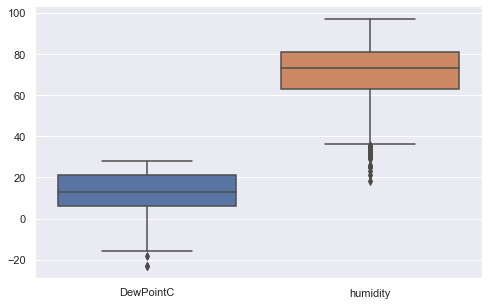

In [74]:
sns.boxplot(data = df1[['DewPointC','humidity']])

In [75]:
df1[['DewPointC','humidity']].quantile(0.01)

DewPointC    -8.0
humidity     33.0
Name: 0.01, dtype: float64

In [76]:
# в столбце видимость видим много выбросов и большой их разброс видимо ввиду специфики самой шкалы параметра

<AxesSubplot:>

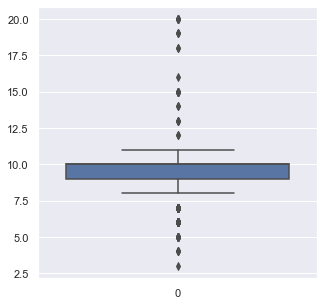

In [77]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(data = df1['visibility'])

In [78]:
print(df1['visibility'].quantile(0.99), df1['visibility'].quantile(0.01))

13.0 6.0


In [79]:
#  выделим строки с обнаруженными погодными аномалиями в отдельный датасет 

In [80]:
df1_anomaly = df1.loc[(df1['totalSnow_cm'] > df1['totalSnow_cm'].quantile(0.995)) | \
                      (df1['precipMM'] > df1['precipMM'].quantile(0.99)) | \
                     (df1['windspeedKmph'] > df1['windspeedKmph'].quantile(0.99)) |\
                     (df1['DewPointC'] < df1['DewPointC'].quantile(0.01)) |\
                     (df1['humidity'] < df1['humidity'].quantile(0.01)) |\
                     (df1['visibility']<df1['visibility'].quantile(0.01))]
print('кол-во дней с аномальными погодными условиями', len(df1_anomaly))

кол-во дней с аномальными погодными условиями 98


In [81]:
print('Высокое значение уровня снежного покрова, кол-во дней -', len(df1.loc[(df1['totalSnow_cm'] > df1['totalSnow_cm'].quantile(0.995))]))
print('Высокое значение уровня осадков, кол-во дней -', len(df1.loc[(df1['precipMM'] > df1['precipMM'].quantile(0.99))]))
print('Высокое значение скорости ветра, кол-во дней -', len(df1.loc[(df1['windspeedKmph'] > df1['windspeedKmph'].quantile(0.99))]))
print('Низкое значение точки росы, кол-во дней -', len(df1.loc[(df1['DewPointC'] < df1['DewPointC'].quantile(0.01))]))
print('Низкое значение влажности, кол-во дней -', len(df1.loc[ (df1['humidity'] < df1['humidity'].quantile(0.01))]))
print('Очень низкая видимость -', len(df1.loc[(df1['visibility']<df1['visibility'].quantile(0.01))]))

Высокое значение уровня снежного покрова, кол-во дней - 11
Высокое значение уровня осадков, кол-во дней - 26
Высокое значение скорости ветра, кол-во дней - 24
Низкое значение точки росы, кол-во дней - 21
Низкое значение влажности, кол-во дней - 20
Очень низкая видимость - 17


### 3.2.2 Данные по загрязнителям <a id='part3.2.2'></a>

In [82]:
# второй набор данных

In [83]:
df2.describe()

,pm25,pm10,o3,no2,so2,co
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000
mean,106.110176,47.725854,43.703326,19.984868,4.791076,6.027767
std,40.567392,20.640963,21.840279,9.586806,3.744629,2.317980
min,27.000000,8.000000,4.000000,1.000000,1.000000,1.000000
25%,75.000000,33.000000,29.000000,13.000000,2.000000,4.000000
50%,101.000000,45.000000,39.000000,18.000000,4.000000,6.000000
75%,133.000000,59.000000,51.000000,25.000000,6.000000,7.000000
max,409.000000,164.000000,143.000000,69.000000,37.000000,19.000000


<AxesSubplot:>

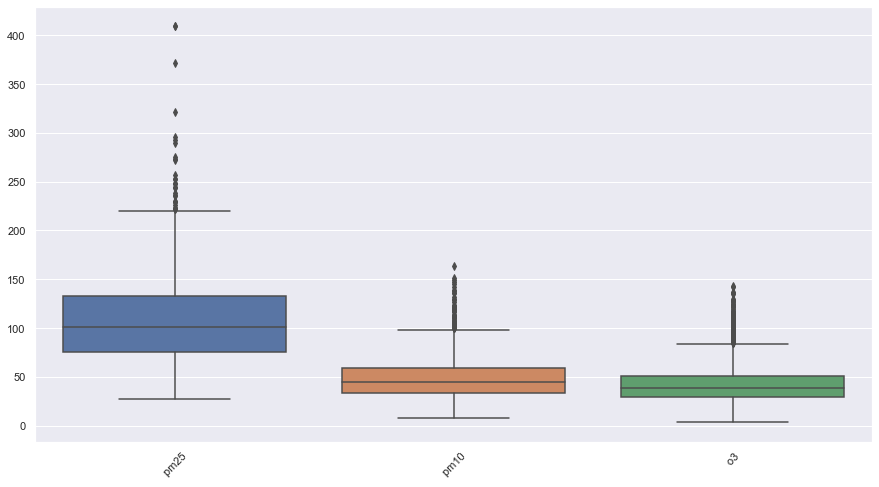

In [84]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(rotation=45)
sns.boxplot(data = df2[[' pm25', ' pm10', ' o3']])

<AxesSubplot:>

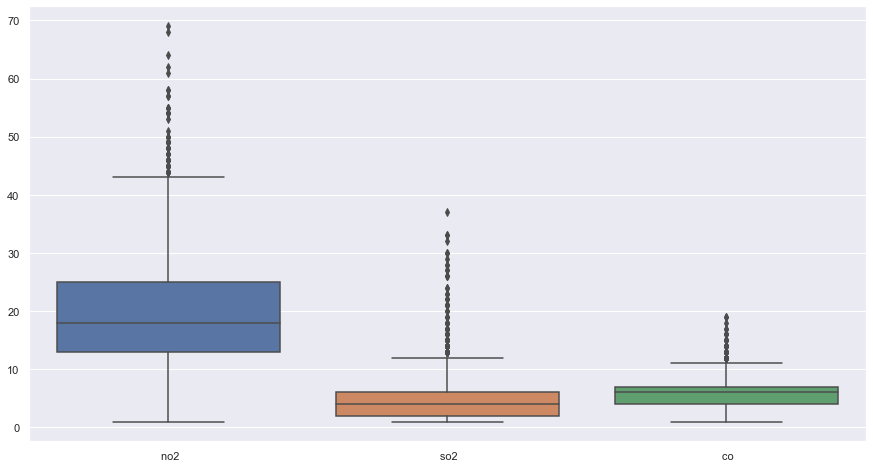

In [85]:
sns.boxplot(data = df2[[' no2', ' so2', ' co']])

In [86]:
# везде есть выбросы в сторону высокого значения показателей, что логично

In [87]:
# можно также поместить аномальные значения в отдельную выборку, сделать merge с аномальной выборкой из первого датасета 
# чтобы оценить много ли общих дат получится

In [88]:
df2[' co'].quantile(0.97)

11.0

In [89]:
df2_anomaly = df2.loc[(df2[' pm25'] > df2[' pm25'].quantile(0.99)) | (df2[' pm10'] > df2[' pm10'].quantile(0.99)) | \
                     (df2[' o3'] > df2[' o3'].quantile(0.95)) | (df2[' no2'] > df2[' no2'].quantile(0.97)) |\
                     (df2[' so2'] > df2[' so2'].quantile(0.95)) | (df2[' co'] > df2[' co'].quantile(0.97))]
print('кол-во дней с очень высокими значения загрязнителей', len(df2_anomaly))

кол-во дней с очень высокими значения загрязнителей 333


In [90]:
print(' Повышенное значение pm25, кол-во дней -', len(df2.loc[(df2[' pm25'] > df2[' pm25'].quantile(0.99))]))
print(' Повышенное значение pm10, кол-во дней -', len(df2.loc[(df2[' pm10'] > df2[' pm10'].quantile(0.99))]))
print(' Повышенное значение o3, кол-во дней -', len(df2.loc[(df2[' o3'] > df2[' o3'].quantile(0.95))]))
print(' Повышенное значение no2, кол-во дней -', len(df2.loc[(df2[' no2'] > df2[' no2'].quantile(0.97))]))
print(' Повышенное значение so2, кол-во дней -', len(df2.loc[(df2[' so2'] > df2[' so2'].quantile(0.95))])) 
print(' Повышенное значение co, кол-во дней -', len(df2.loc[(df2[' co'] > df2[' co'].quantile(0.97))])) 

 Повышенное значение pm25, кол-во дней - 26
 Повышенное значение pm10, кол-во дней - 25
 Повышенное значение o3, кол-во дней - 120
 Повышенное значение no2, кол-во дней - 75
 Повышенное значение so2, кол-во дней - 124
 Повышенное значение co, кол-во дней - 66


In [91]:
print('Всего пересечений аномальных погодных условий и очень высоких показателей загрязнения, дней - ',\
      len(df2_anomaly.merge(df1_anomaly, how='inner', on='date')))

Всего пересечений аномальных погодных условий и очень высоких показателей загрязнения, дней -  8


In [92]:
# пересечений аномалий погодных условий и очень высоких значений загрязнителей практически нет
# значит нужно искать менее очевидные зависомости исследуя связи конкретных признаков с AQI

### 3.3 Исследование целевого параметра <a id='part3.3'></a> 

Классификация AQI:  


От 0 до 50 Хороший  
51 к 100 Умеренный   
От 101 до 150 Вредный для чувствительных групп  
151–200 Вредный  
201 к 300 Очень вредный  
От 301 до 500 Опасный  

In [93]:
# посмотрим распределение индекса качества воздуха AQI по категориям и в абсолютных величинах

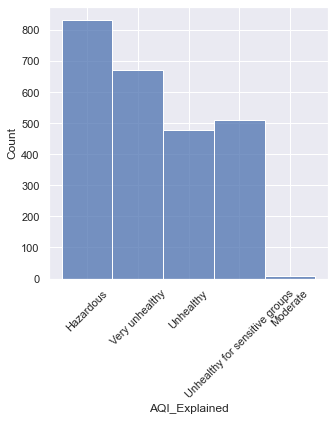

<AxesSubplot:xlabel='AQI', ylabel='Count'>

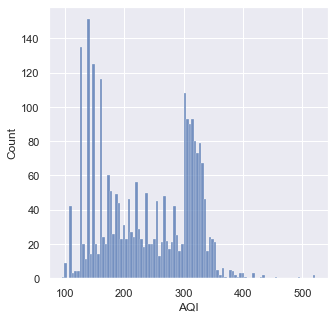

In [94]:
sns.set(rc={'figure.figsize':(5,5)})
plt.xticks(rotation=45)
sns.histplot(df1['AQI_Explained'], kde=False, bins=5) 
plt.show()
sns.histplot(df1['AQI'], kde=False, bins=100)

In [95]:
df1['AQI_Explained'].value_counts()

Hazardous                         833
Very unhealthy                    672
Unhealthy for sensitive groups    511
Unhealthy                         478
Moderate                            8
Name: AQI_Explained, dtype: int64

In [96]:
# дни с неблагоприятными значениями индекса для основного населения преобладают 

In [97]:
# выведем для наглядности также распределение всех категорий по годам

In [98]:
df = df1.set_index("date")

In [99]:
years = ["2021","2020","2019","2018","2017","2016","2015","2014"]
for year in years:
    print (year)
    print('Средний AQI - ', round(df.loc[year].AQI.mean(),0))
    print (df.loc[year]["AQI_Explained"].value_counts())
    print ("--------------"*3)

2021
Средний AQI -  262.0
Very unhealthy    13
Hazardous         11
Unhealthy          6
Name: AQI_Explained, dtype: int64
------------------------------------------
2020
Средний AQI -  209.0
Unhealthy                         104
Unhealthy for sensitive groups    102
Very unhealthy                     77
Hazardous                          75
Moderate                            6
Name: AQI_Explained, dtype: int64
------------------------------------------
2019
Средний AQI -  231.0
Very unhealthy                    111
Hazardous                         103
Unhealthy                          75
Unhealthy for sensitive groups     74
Name: AQI_Explained, dtype: int64
------------------------------------------
2018
Средний AQI -  231.0
Very unhealthy                    112
Hazardous                         105
Unhealthy for sensitive groups     90
Unhealthy                          56
Moderate                            1
Name: AQI_Explained, dtype: int64
------------------------------------

In [100]:
category_order = ["Hazardous",
                 "Very unhealthy",
                  "Unhealthy",
                  "Unhealthy for sensitive groups",
                  "Moderate",
                  "Good"
                 ]

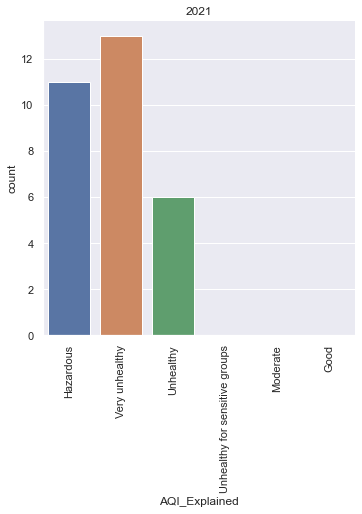

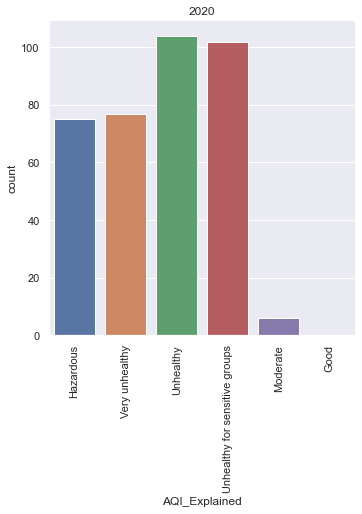

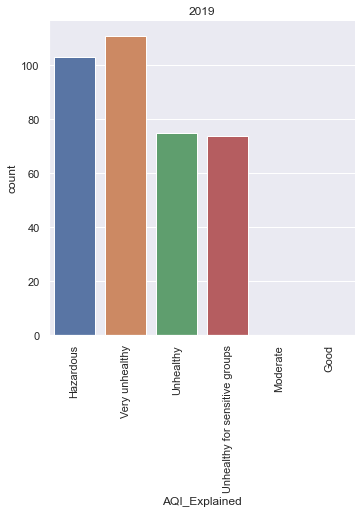

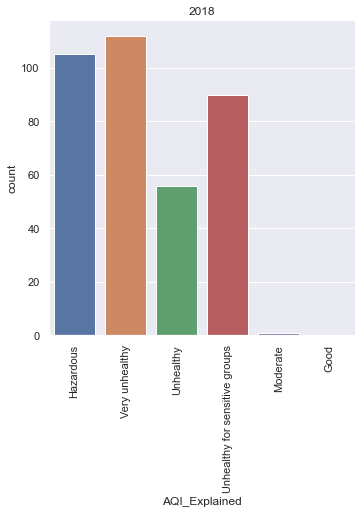

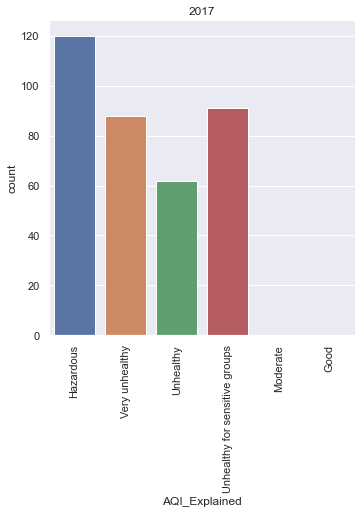

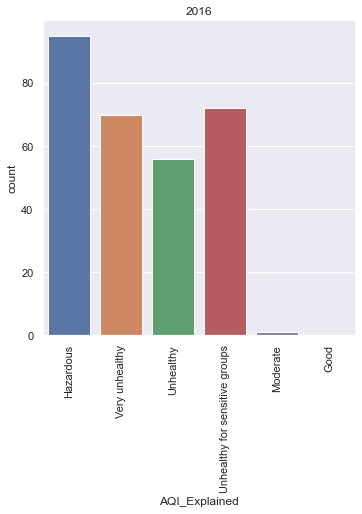

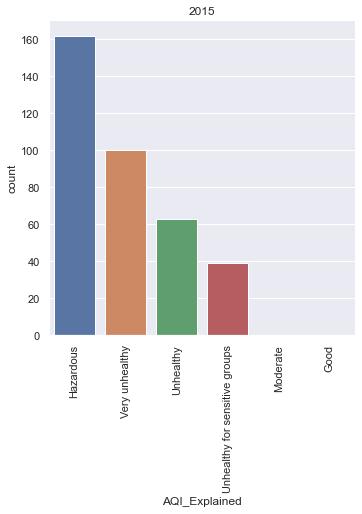

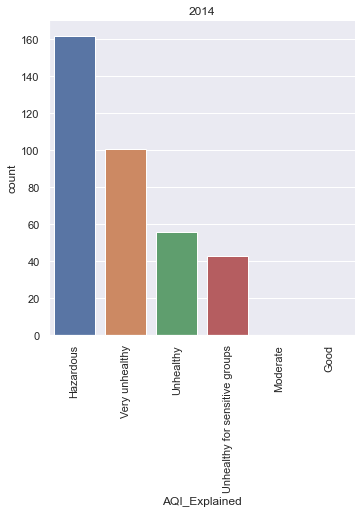

In [101]:
for year in years:
    sns.catplot( x= "AQI_Explained",data = df.loc[year],kind = "count", order=category_order)
    plt.xticks(rotation=90)
    plt.title(year)

### 3.3.1 Влияние погодных аномалий  <a id='part3.3.1'></a>

In [102]:
# посмотрим распределение индекса качества воздуха для "аномальной" выборки в абсолютных единицах и по категориям

<AxesSubplot:xlabel='AQI', ylabel='Count'>

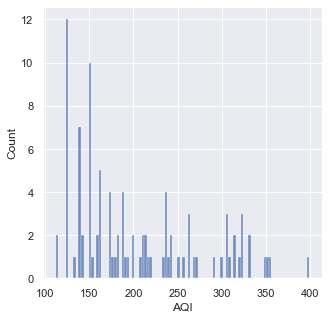

In [103]:
sns.histplot(df1_anomaly['AQI'], kde=False, bins=100) 

<AxesSubplot:xlabel='AQI_Explained', ylabel='Count'>

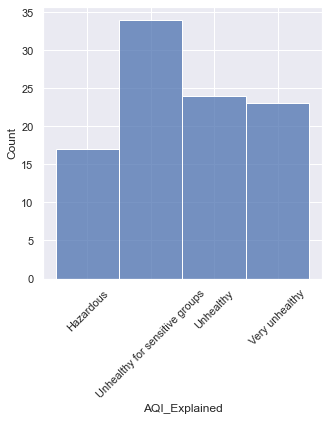

In [104]:
plt.xticks(rotation=45)
sns.histplot(df1_anomaly['AQI_Explained'], kde=False, bins=5) 

In [105]:
df1_anomaly['AQI_Explained'].value_counts()

Unhealthy for sensitive groups    34
Unhealthy                         24
Very unhealthy                    23
Hazardous                         17
Name: AQI_Explained, dtype: int64

In [106]:
# в эти дни наблюдается большее смещение картины в сторону низкого индекса, т.е. воздух в таких условиях зачастую чище.

<AxesSubplot:xlabel='AQI_Explained', ylabel='Count'>

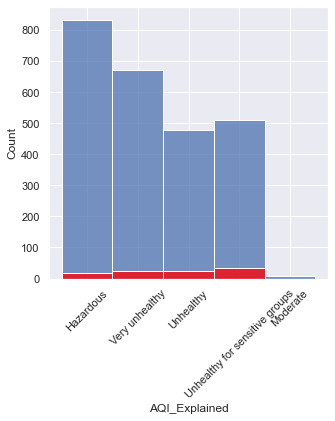

In [107]:
plt.xticks(rotation=45)
sns.histplot(df1['AQI_Explained'], kde=False, bins=5) 
sns.histplot(df1_anomaly['AQI_Explained'], kde=False, bins=5, color='red') 

In [108]:
# но в целом при наложении графиков видим, что на общее распределение дни с аномальными условиями не будут оказывать
# сильного влияние, наиболее заметен будет вклад в категории "Unhealthy for sensitive groups"

### 3.3.2 Влияние COVID-19 <a id='part3.3.2'></a>


In [109]:
# средний AQI 

year_AQI = df1.groupby(df1['date'].dt.strftime('%Y'))['AQI'].mean().round()
year_AQI.sort_values()

date
2020    209.0
2018    231.0
2019    231.0
2016    232.0
2017    233.0
2014    258.0
2015    258.0
2021    262.0
Name: AQI, dtype: float64

средний AQI за 2020 год, как период наибольших локдаунов, самый низкий среди всех прочих лет.

В связи с этим при построении прогнозной модели этот период можно попробовать не учитывать, поскольку условия были отличными от стандартных и этот пласт данных может повлиять на общую модель прогнозированияво и снизить её точность

In [110]:
# посмотрим как уровни загрязнителей стали отличаться в этот период, где разница наибольшая

In [111]:
#  разделим 2ой датасет на два временных отрезка , в доовидном возьмем средние показатели за одни и те же дни в году

In [112]:
df2_sorted = df2.sort_values(by= ["date"])
df2_non_covid= df2_sorted.loc[df2_sorted['date'] <"2020-01-01"]

In [113]:
df2_non_covid_year = df2_non_covid.groupby(df2_non_covid['date'].dt.strftime('%m-%d')).mean()
df2_non_covid_year.head()

,pm25,pm10,o3,no2,so2,co
date,,,,,,
01-01,150.388421,62.552083,29.541667,30.354167,11.833333,7.75
01-02,130.600000,65.200000,27.200000,34.200000,12.400000,9.40
01-03,146.200000,71.200000,25.000000,34.400000,13.000000,9.00
01-04,159.666667,59.541667,25.833333,34.916667,10.666667,8.00
01-05,126.600000,43.600000,22.600000,29.800000,7.600000,6.60


In [114]:
# ковидная выборка за 2020 г

In [115]:
df2_covid = df2_sorted.loc[(df2_sorted['date'] >= "2020-01-01") & (df2_sorted['date'] < "2021-01-01")]
df2_covid.set_index(df2_covid['date'].dt.strftime('%m-%d'),inplace = True)
df2_covid = df2_covid.drop('date', axis=1)
df2_covid.head()

,pm25,pm10,o3,no2,so2,co
date,,,,,,
01-01,106.110176,23.0,24.0,19.0,3.0,3.0
01-02,52.000000,32.0,13.0,31.0,3.0,4.0
01-03,72.000000,43.0,13.0,28.0,3.0,5.0
01-04,133.000000,55.0,23.0,22.0,3.0,6.0
01-05,137.000000,45.0,24.0,24.0,3.0,5.0


In [116]:
covid_compration = df2_covid.merge(df2_non_covid_year, how='left', on='date' )
covid_compration.head()

,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y
date,,,,,,,,,,,,
01-01,106.110176,23.0,24.0,19.0,3.0,3.0,150.388421,62.552083,29.541667,30.354167,11.833333,7.75
01-02,52.000000,32.0,13.0,31.0,3.0,4.0,130.600000,65.200000,27.200000,34.200000,12.400000,9.40
01-03,72.000000,43.0,13.0,28.0,3.0,5.0,146.200000,71.200000,25.000000,34.400000,13.000000,9.00
01-04,133.000000,55.0,23.0,22.0,3.0,6.0,159.666667,59.541667,25.833333,34.916667,10.666667,8.00
01-05,137.000000,45.0,24.0,24.0,3.0,5.0,126.600000,43.600000,22.600000,29.800000,7.600000,6.60


In [117]:
# X - covid выборка, Y - до covid
covid_compration.describe()

,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y
count,364.000000,364.00000,364.000000,364.000000,364.000000,364.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,92.519836,38.99794,41.440530,16.274725,2.040007,5.964286,108.943687,49.311323,43.937361,20.673600,5.371097,6.036639
std,37.811146,16.31977,17.557738,7.508769,0.978878,2.222187,23.636087,10.720315,14.537636,6.194333,2.141877,1.229636
min,39.000000,12.00000,4.000000,4.000000,1.000000,1.000000,53.666667,24.333333,15.833333,8.500000,2.166667,3.833333
25%,66.000000,28.00000,30.000000,10.000000,1.000000,4.000000,90.333333,41.166667,31.600000,15.800000,3.833333,5.166667
50%,82.000000,35.00000,39.000000,15.000000,2.000000,6.000000,108.200000,48.333333,44.166667,20.000000,5.000000,5.800000
75%,111.000000,48.25000,46.000000,20.000000,2.125000,7.000000,127.000000,56.700000,53.225277,25.183333,6.400000,6.600000
max,321.000000,107.00000,125.000000,48.000000,5.000000,15.000000,174.500000,87.200000,78.500000,37.666667,13.200000,10.500000


-Мелкодиспресные и микроскопическиечастицы **pm25,pm10, no2** - видим  смещение показателей влево, но из-за наличия единичных высоких значений показателей в ковид среднеквадратичное отклонение больше. 

-По озону **o3** ситуация неоднозначная, сделаем стат.тест, чтобы выявить есть ли статистическая значимая разница в двух выборках  

-**so2** видим сильное смещение влево, что скорее всего связано с ограничением работы промышленных объектов и производств, которые сжигают ископаемое топливо и являются основным источником диоксида серы.  

-распределение по угарному газу **co** в ковидный период более "размазано", чем в остальные года, но в целом средний уровень загрязнения такой же, проверим по тесту Стьюдента

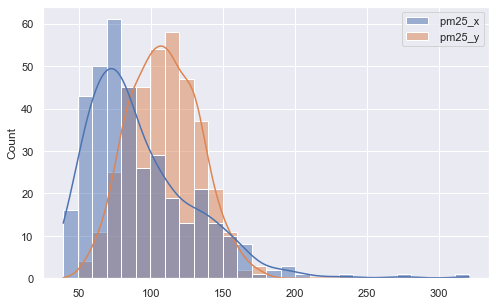

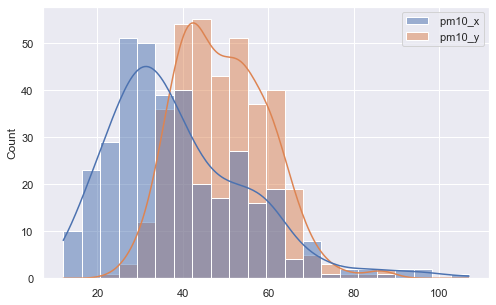

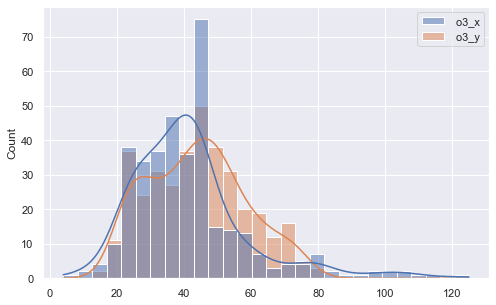

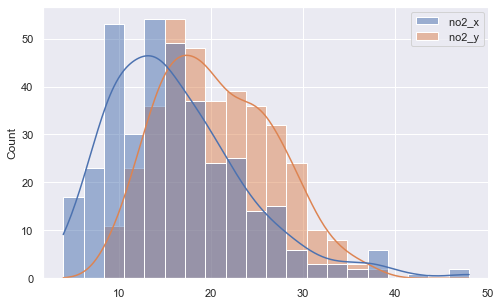

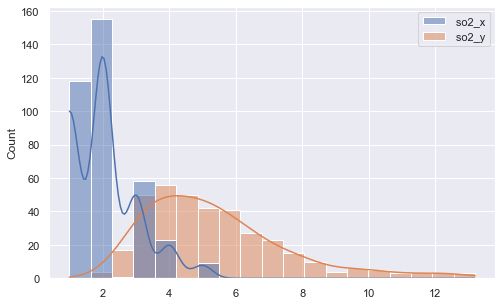

<AxesSubplot:ylabel='Count'>

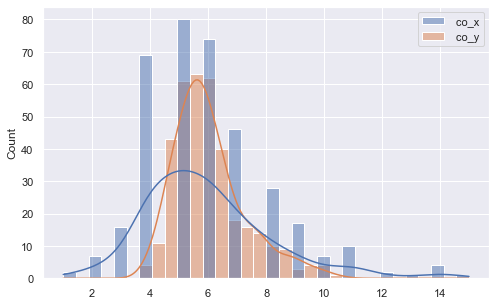

In [118]:
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(covid_compration[[' pm25_x',' pm25_y']], kde=True)
plt.show()
sns.histplot(covid_compration[[' pm10_x',' pm10_y']], kde=True)
plt.show()
sns.histplot(covid_compration[[' o3_x',' o3_y']], kde=True)
plt.show()
sns.histplot(covid_compration[[' no2_x',' no2_y']], kde=True)
plt.show()
sns.histplot(covid_compration[[' so2_x',' so2_y']], kde=True)
plt.show()
sns.histplot(covid_compration[[' co_x',' co_y']], kde=True)

In [119]:
# covid_compration.info()
# covid_compration.sort_values(by= [' o3_y']) # '02-29' есть NaN, исключим, чтобы тесты работали
covid_compration = covid_compration.loc[covid_compration.index != '02-29']

H0: распределение значений по озону во время локдауна и до него одинаково  
H1: распределение значений различается

In [120]:
from scipy.stats import mannwhitneyu 
stat, p = mannwhitneyu(covid_compration[' o3_x'], covid_compration[' o3_y']) # U-тест Манна-Уитни
print('Statistics=%f, p=%f' % (stat, p))

alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=55571.500000, p=0.000131
Разные распределения (отвергаем H0)


H0: среднее значение по угарному газу во время локдауна и до него одинаково  
H1: среднее значение различается

In [121]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_ind(covid_compration[' co_x'], covid_compration.loc[covid_compration.index != '02-29'][' co_y'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.5429500756850045, pvalue=0.5873785922172019)
Не отвергаем нулевую гипотезу


### 3.3.3 Корреляция признаков между собой и с целевым параметром <a id='part3.3.3'></a> 

In [122]:
# построим тепловую карту взаимосвязи признаков для наглядности, поскольку их достаточно много

In [123]:
df1.columns

Index(['date', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'windspeedKmph', 'AQI', 'AQI_Explained'],
      dtype='object')

<AxesSubplot:>

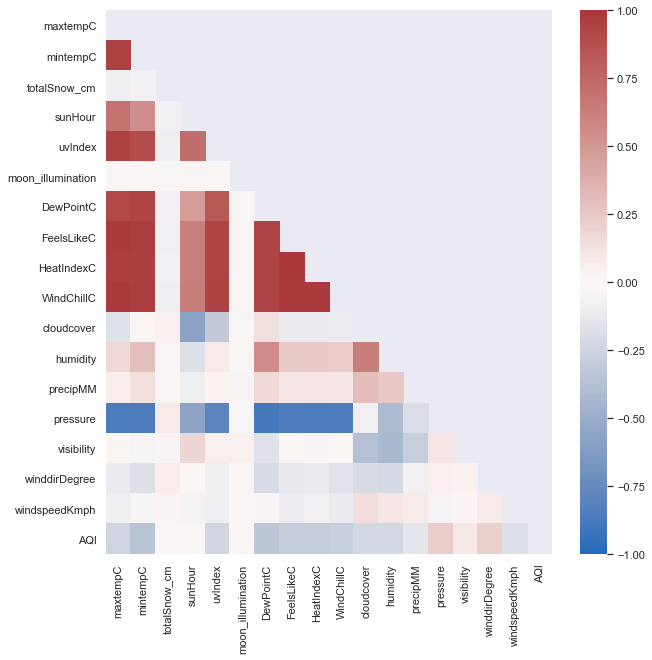

In [124]:
sns.set(rc={'figure.figsize':(10,10)})
corr = df1.corr()
mask = np.triu(corr)
sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, cmap='vlag')

In [125]:
# среди наиболее выраженных прямых зависимостей связи различных температурных показателей, что логично, поскольку 
# все они по сути отражают температуру одного и того же дня, но измеренную в разное время и вычисленную разными способами

# интересной видится зависимость uvIndex с температурными показателями

<AxesSubplot:xlabel='uvIndex', ylabel='maxtempC'>

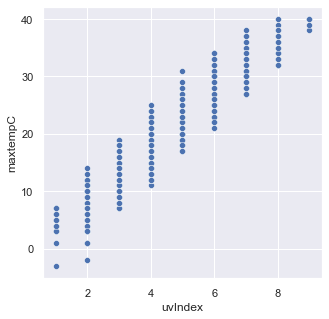

In [126]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=df1, x="uvIndex", y="maxtempC")

In [127]:
# обратная зависимость достаточно сильная у давления с температурой (мин., макс, точка росы, ощущаемая t - "на ощупь", "на солнце")
# также интересно, что давление обратно зависит от uvIndex

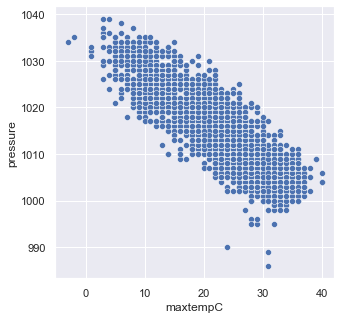

<AxesSubplot:xlabel='uvIndex', ylabel='pressure'>

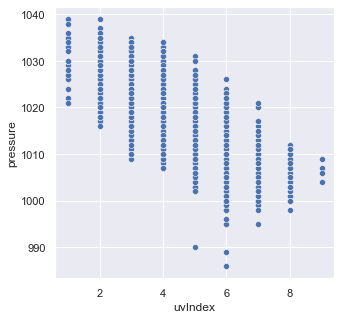

In [128]:
sns.scatterplot(data=df1, x="maxtempC", y="pressure");
plt.show()
sns.scatterplot(data=df1, x="uvIndex", y="pressure")

In [129]:
# посмотрим влияние всех климатических показателей на значения AQI через коэффициент корреляции

In [130]:
# корреляционная матрица

In [131]:
df1.corr()[['AQI']].sort_values(by='AQI', ascending=False)

,AQI
AQI,1.000000
pressure,0.228836
winddirDegree,0.221684
visibility,0.095625
moon_illumination,0.011110
totalSnow_cm,-0.005168
sunHour,-0.024349
precipMM,-0.144151
windspeedKmph,-0.176586
cloudcover,-0.220535


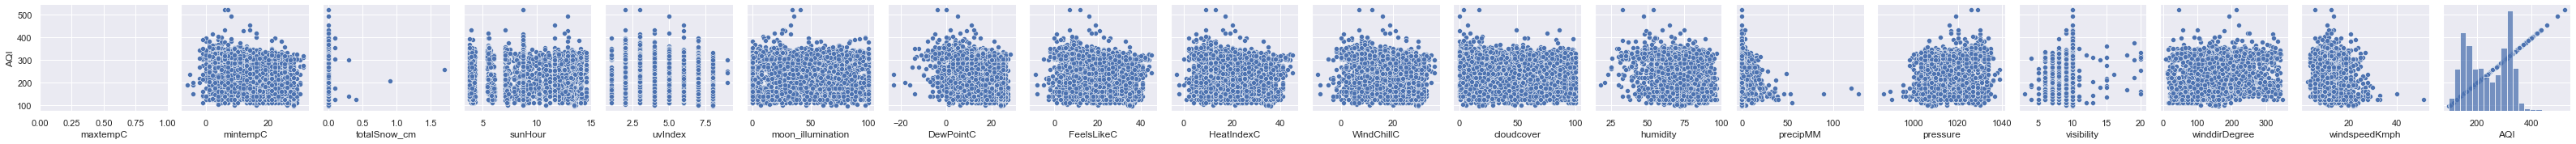

In [132]:
sns.pairplot(df1, y_vars='AQI')

In [133]:
# значения коэффициента очень незначительны
# более менее четких линейных зависимостей c AQI нет, нужен более подробный анализ для анализа влияния признаков

In [134]:
# может анализ скоррелированности AQI с каким-либо загрязнителем будет наиболее очевиден
# добавим ко второму датасету столбец AQI и также выведем корреляционную матрицу

In [135]:
df2_aqi = df2.merge(df1[['date','AQI']], how = 'left', on ='date')
df2_aqi.corr()[['AQI']].sort_values(by='AQI', ascending=False)

,AQI
AQI,1.000000
pm25,0.939574
pm10,0.558125
no2,0.458521
co,0.396551
so2,0.391330
o3,0.063889


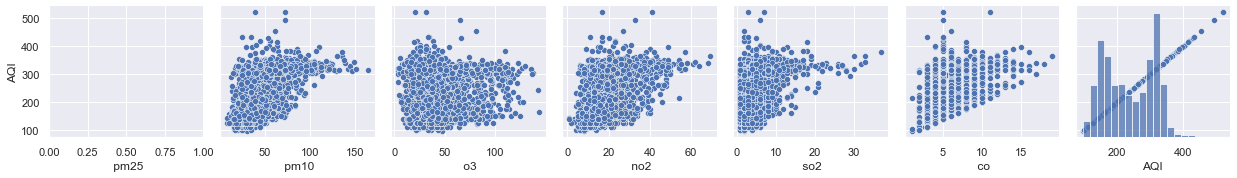

In [136]:
sns.pairplot(df2_aqi, y_vars='AQI')
plt.show()

<AxesSubplot:xlabel=' pm25', ylabel='AQI'>

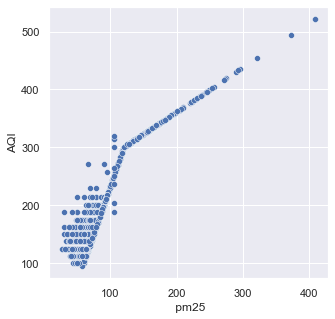

In [137]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=df2_aqi, x=" pm25", y="AQI")

In [138]:
# четко видим в "опасной" зоне AQI свыше 300 ед. строгую линейную зависимость с pm25, что говорит нам о том,
# что этот загрязнитель является определяющим в случаях высокого загрязнения воздуха

## Раздел 4. Выявление погодных факторов, наиболее влияющих на AQI <a id='part4'></a> 

Поскольку анализ коэффициента корреляции погодных показателей на индекс качества воздуха не дал понимания о признаках,  наиболее влияющих на AQI используем для этих целей методы, применяемые для отборки значимых признаков для построения моделей обучения.
Применим два метода разных метода и посмотрим различия между ними

### 4.1 Отбор признаков по f-регрессии <a id='part4.1'></a> 

In [139]:
# отборка значимых признаков используется для поиска наиболее влияющих предикторов
# В методе f-регрессии -F-тест оценивает степень линейной зависимости между предикторами и целевой переменной

In [140]:
# исключим целевой показатель
columns = df.columns[0:(len(df.columns)-2)]
columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [141]:
from sklearn.feature_selection import f_regression

print(f_regression (df[columns],df.AQI))
p_values = f_regression (df[columns],df.AQI)[1] # второй список - это p-value
p_values.round(3)

(array([1.66413493e+02, 3.60172841e+02, 6.67690758e-02, 1.48305495e+00,
       1.47800469e+02, 3.08611505e-01, 3.04612544e+02, 2.29776309e+02,
       2.39051949e+02, 2.13171568e+02, 1.27804969e+02, 1.32377606e+02,
       5.30514173e+01, 1.38149020e+02, 2.30714094e+01, 1.29209689e+02,
       8.04660652e+01]), array([6.58209809e-37, 3.85774457e-75, 7.96121703e-01, 2.23412084e-01,
       4.41657695e-33, 5.78583180e-01, 1.85138455e-64, 1.01077494e-49,
       1.43007304e-51, 2.14648305e-46, 6.16193050e-29, 6.89844709e-30,
       4.33351658e-13, 4.37695587e-31, 1.65320396e-06, 3.14323284e-29,
       5.66310800e-19]))


array([0.   , 0.   , 0.796, 0.223, 0.   , 0.579, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [142]:
# смотрим на p-value и отбрасываем те признаки, где он получился больше 0

In [143]:
columns_f_statistics =[]
for index, i in enumerate(p_values.round(3)):
    if i > 0 :
        columns_f_statistics.append(df[columns].columns[index])
columns_f_statistics

['totalSnow_cm', 'sunHour', 'moon_illumination']

In [144]:
# отбрасываем три предиктора

In [145]:
df_fstat = df.drop(columns_f_statistics, axis=1)
df_fstat.drop(["AQI","AQI_Explained"],axis=1,inplace=True)
df_fstat.head()

,maxtempC,mintempC,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,
2014-01-01,15,5,4,-1,11,12,11,0,43,0.0,1021.0,10,242,12
2014-01-02,14,7,4,4,11,13,11,3,60,0.0,1019.0,10,141,14
2014-01-03,16,9,4,3,11,12,11,26,55,0.0,1017.0,10,295,14
2014-01-04,10,4,2,3,7,9,7,24,68,0.1,1022.0,10,169,14
2014-01-05,10,3,3,3,9,9,9,12,66,0.0,1024.0,10,117,6


### 4.2 Отбор признаков по методу Лассо <a id='part4.2'></a> 

In [146]:
from sklearn.linear_model import Lasso

In [147]:
# в этом методе вычисляем коэфф-ты лассо, передавая в модель предикторы и цель

In [148]:
lasso = Lasso(alpha=0.2)
lasso_coef = lasso.fit(df[columns],df.AQI).coef_
lasso_Coef = pd.DataFrame({'Columns':columns,'Coef':lasso_coef})
lasso_Coef

,Columns,Coef
0,maxtempC,4.018439
1,mintempC,-7.371687
2,totalSnow_cm,-0.000000
3,sunHour,-0.892496
4,uvIndex,-8.454044
5,moon_illumination,0.016041
6,DewPointC,-2.812730
7,FeelsLikeC,-2.567357
8,HeatIndexC,-0.219313
9,WindChillC,5.038195


In [149]:
# визуализируем

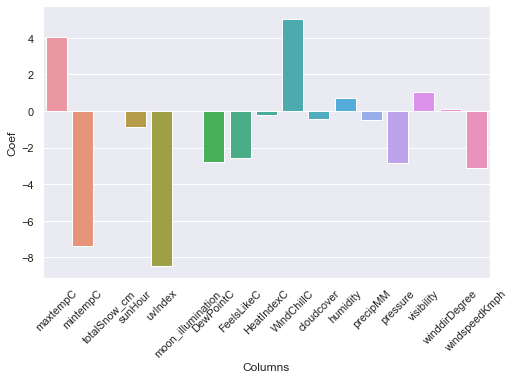

In [150]:
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data=lasso_Coef, x= "Columns", y = "Coef")
plt.xticks(rotation = 45)
plt.show()

In [151]:
# те столбцы, где коэффициенты по модулю меньше 2 - удаляем

In [152]:
columns_lasso = lasso_Coef[np.abs(lasso_Coef.Coef) < 2].Columns
columns_lasso

2          totalSnow_cm
3               sunHour
5     moon_illumination
8            HeatIndexC
10           cloudcover
11             humidity
12             precipMM
14           visibility
15        winddirDegree
Name: Columns, dtype: object

In [153]:
# таких признаков 9

In [154]:
df_lasso = df.drop(columns_lasso, axis=1)
df_lasso.drop(["AQI","AQI_Explained"],axis=1,inplace=True)
df_lasso.head()

,maxtempC,mintempC,uvIndex,DewPointC,FeelsLikeC,WindChillC,pressure,windspeedKmph
date,,,,,,,,
2014-01-01,15,5,4,-1,11,11,1021.0,12
2014-01-02,14,7,4,4,11,11,1019.0,14
2014-01-03,16,9,4,3,11,11,1017.0,14
2014-01-04,10,4,2,3,7,7,1022.0,14
2014-01-05,10,3,3,3,9,9,1024.0,6


In [155]:
# объединим результаты

In [156]:
features_used_F = pd.DataFrame({"F_Selected":df_fstat.columns})
features_used_Lasso = pd.DataFrame ({"Lasso_Selected":df_lasso.columns})
features_used = pd.merge(features_used_Lasso,features_used_F, left_on="Lasso_Selected",right_on="F_Selected", how= "outer")
features_used 

,Lasso_Selected,F_Selected
0,maxtempC,maxtempC
1,mintempC,mintempC
2,uvIndex,uvIndex
3,DewPointC,DewPointC
4,FeelsLikeC,FeelsLikeC
5,WindChillC,WindChillC
6,pressure,pressure
7,windspeedKmph,windspeedKmph
8,NaN,HeatIndexC
9,NaN,cloudcover


В соответствии с обеими моделями выбора функций (f статистика и лассо )следующие погодные условия оказывают наибольшее влияние на AQI:  

1) Минимальная, максимальная и ощущаемая температура **maxtempC mintemp FeelsLikeC**  
2) УФ-индекс **uvIndex**    
Ультрафиолетовый индекс, или УФ-индекс, представляет собой международное стандартное измерение силы ультрафиолетового (УФ) излучения, вызывающего солнечные ожоги, в определенном месте и в определенное время.  
3) Точка росы **DewPointC**  
Представляет температуру, до которой воздух должен быть охлажден, чтобы достичь уровня насыщения влагой. По достижении точки росы, капли воды  начинают образовываться на твердых предметах  
4)  Так называемая температура “на ощупь” и скорость ветра **WindChillC windspeedKmph** Ветровой холод представляет, насколько холодная погода ощущается на коже человека, когда учитывается охлаждающий эффект ветра.  
5) Давление **pressure**

## Раздел 5. Построение прогнозной модели AQI <a id='part5'></a>

In [157]:
# функция классификатор категорий AQI

def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Moderate"
    elif x <= 150:
        return "Unhealthy for sensitive groups"
    elif x <= 200:
        return "Unhealthy"
    elif x <= 300:
        return "Very unhealthy"
    elif x > 300:
        return "Hazardous"
    else:
        return np.NaN

In [158]:
# прописываем конвертирующую функцию количественного AQI в категории
def convert_to_explained_AQI (data):
    explained_AQI = data
    for i in data.columns:
        explained_AQI[i] = data[i].apply(lambda x: get_AQI_bucket(x))
    return explained_AQI

In [159]:
# добавим в качестве дополнительных параметров временные метки данных - месяц, время года

In [161]:
df['month'] = df.index.month

In [162]:
# def seasons(x):
#     if x <= 2:
#         return "Winter"
#     elif x <= 5:X_class_train, y_class_train
#         return "Spring"
#     elif x <= 8:
#         return "Summer"
#     elif x <= 11:
#         return "Autumn"
#     elif x == 12:
#         return "Winter"
#     else:
#         return np.NaN

In [163]:
def seasons(x):
    if x <= 2:
        return 1
    elif x <= 5:
        return 2
    elif x <= 8:
        return 3
    elif x <= 11:
        return 4
    elif x == 12:
        return 1
    else:
        return np.NaN

In [164]:
season = []
for i in df.index.month:
        season.append(seasons(i))
df['season'] = season
df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,...,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained,month,season
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,15,5,0.0,8.7,4,0,-1,11,12,11,...,43,0.0,1021.0,10,242,12,319,Hazardous,1,1
2014-01-02,14,7,0.0,8.7,4,2,4,11,13,11,...,60,0.0,1019.0,10,141,14,352,Hazardous,1,1
2014-01-03,16,9,0.0,8.7,4,10,3,11,12,11,...,55,0.0,1017.0,10,295,14,338,Hazardous,1,1
2014-01-04,10,4,0.0,5.5,2,17,3,7,9,7,...,68,0.1,1022.0,10,169,14,355,Hazardous,1,1
2014-01-05,10,3,0.0,8.7,3,24,3,9,9,9,...,66,0.0,1024.0,10,117,6,343,Hazardous,1,1


In [166]:
columns_class = columns.append(df.columns[-2:])
print(len(columns_class))
columns_class

19


Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'windspeedKmph', 'month', 'season'],
      dtype='object')

In [ ]:
# разделяем датасет на обучающую и тестовую выборки

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
# делим на X-предикторы и y-целевая переменная
X = df[columns_class]
X.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,month,season
date,,,,,,,,,,,,,,,,,,,
2014-01-01,15,5,0.0,8.7,4,0,-1,11,12,11,0,43,0.0,1021.0,10,242,12,1,1
2014-01-02,14,7,0.0,8.7,4,2,4,11,13,11,3,60,0.0,1019.0,10,141,14,1,1
2014-01-03,16,9,0.0,8.7,4,10,3,11,12,11,26,55,0.0,1017.0,10,295,14,1,1
2014-01-04,10,4,0.0,5.5,2,17,3,7,9,7,24,68,0.1,1022.0,10,169,14,1,1
2014-01-05,10,3,0.0,8.7,3,24,3,9,9,9,12,66,0.0,1024.0,10,117,6,1,1


In [169]:
y= df.AQI

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Т.к. прогнозируемый показатель AQI -  непрерывная величина, для начала попробуем использовать модели регресии, построив их на всех данных, далее по факту оценки эффективности будем принимать решение о корректировки модели и входной выборки.   


Уже имеем отборку параметров выбранных c помощью различных методов (f_regression, lasso). При построении модели машинного обучения не всегда понятно, какие из признаков действительно для неё важны (т.е. имеют связь с целевой переменной), а какие являются избыточными (или шумовыми). Удаление избыточных признаков позволяет лучше понять данные, а также сократить время настройки модели, улучшить её точность и облегчить интерпретируемость

In [178]:
# возможные модели - линейная регрессия и кросс валидация, случайный лес , прогноз можно сделать по дням и по месяцам 

In [303]:
# метрики для оценки качества моделей

from sklearn.metrics import r2_score # R^2 (коэффициент детерминации)
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score # является хорошей метрикой для сбалансированных классов 

#### **GridSearchCV**

также в моделях будем испрользовать оптимизацию путем настройки гиперпараметров  
GridSearchCV (estimator,
                     param_grid = parameters,
                     scoring = [],
                     cv = 5)   
                       
оценщик : используемый объект оценщика (модели)
param_grid : словарь, содержащий все параметры, которые нужно попробовать  
scoring : метрика оценки, используемая при ранжировании результатов  
cv : перекрестная проверка, количество сверток cv для каждой комбинации параметров  

In [182]:
from sklearn.model_selection import GridSearchCV

### 5.1 Модель линейной регресиии <a id='part5.1'></a>

In [174]:
from sklearn.linear_model import LinearRegression

In [180]:
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred_lr = regression.predict(X_test)
score_reg = regression.score(X_test,y_test)

In [181]:
# коэффициент качества модели
print('точность - %0.2f' % score_reg)

точность - 0.30


In [197]:
# попробуем найти лучшие параметры

parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
model = regression
grid_reg = GridSearchCV(model,parameters, cv=None)
grid_reg.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [559]:
print ('точность для обучающей выборки- %0.2f' % grid_reg.best_score_ )
print(grid_reg.best_params_)

точность для обучающей выборки- 0.24
{'fit_intercept': True, 'normalize': False}


In [ ]:
# лучшие параметры используются алгоритмом по умолчанию, grid не дал улчшений, точность не улучшилась

In [292]:
y_pred_reg_grid = grid_reg.predict(X_test) 

In [294]:
score_reg_grid = grid_reg.score(X_test,y_test)
print('точность - %0.2f' % score_reg_grid)

точность - 0.30


In [309]:
mse_reg = MSE(y_pred_reg_grid, y_test) 
mse_reg

4179.505168781901

In [ ]:
# используем стандартную кросс-валидацию

### 5.2 Кросс-валидация <a id='part5.2'></a>

Метод обучения на подмножествах данных. Процедура перекрестной проверки актуальна, если существует риск переобучения. обучающая выборка разбивается на k меньших наборов. Модель обучается с использованием  складок в качестве обучающих данных;
Результирующая модель проверяется на оставшейся части данных
Показатель производительности, сообщаемый  перекрестной проверкой является средним из значений, вычисленных в цикле.

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [424]:
# данные разобьем на 4 корзины

In [189]:
reg = LinearRegression()
cv_resutls = cross_val_score(reg,X_train, y_train,cv=4) #вспомогательную функцию для оценщика и набора данных.
cv_resutls #на выходе список значений, от них берем среднее для оценки модели

array([0.14914821, 0.25902521, 0.23837491, 0.32240915])

In [190]:
cross_y_pred = cross_val_predict(reg,X_test,y_test,cv=4)
score_cross = np.mean(cv_resutls) 
print('точность - %0.2f' % score_cross)

точность - 0.24


In [286]:
# ещё одна метрика для оценки модели R^2 (коэффициент детерминации) функция оценки регрессии.Лучший возможный балл 1.0
y_true = y_test
y_pred1 = cross_y_pred
score_cross = r2_score(y_true, y_pred1) 
round(score_cross, 2)

0.24

In [310]:
mse_cross = MSE(cross_y_pred, y_test) 
mse_cross

4532.603094445492

### 5.3 "Случайный лес" регрессия <a id='part5.3'></a>

Механика алгоритма  
-В заданном наборе данных определяется случайная выборка.  
--Далее алгоритм построит по выборке дерево решений.  
-Дерево строится, пока в каждом листе не более n объектов, или пока не будет достигнута определенная высота.  
-Затем будет получен результат прогнозирования из каждого дерева решений.  
-На этом этапе голосование будет проводиться для каждого прогнозируемого результата: мы выбираем лучший признак, делаем разбиение в дереве по нему и повторяем этот пункт до исчерпания выборки.  
-В конце выбирается результат прогноза с наибольшим количеством голосов. Это и есть окончательный результат прогнозирования.


In [194]:
from sklearn.ensemble import RandomForestRegressor 

In [275]:
# n_estimators - число деревьев
rfr_model =  RandomForestRegressor(random_state=1)
rfr_model.fit(X_train, y_train) 
y_pred_rfr = rfr_model.predict(X_test) 

In [276]:
score_rfr = rfr_model.score(X_test,y_test)
print('точность - %0.2f' % score_rfr)

точность - 0.35


In [ ]:
# подберем оптимальные параметры модели

In [287]:
model = rfr_model

In [288]:
parameters = {
    'n_estimators': [100, 150, 200, 300], 'criterion': ['mse', 'mae', 'poisson'],
    'max_depth': [None, 1,2,3,4], 'max_features': ['auto', 'sqrt', 'log2'],
}

In [289]:
rfr_grid = GridSearchCV(model, param_grid = parameters, cv = None)

In [291]:
rfr_grid.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Anaconda\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 300]})

In [558]:
print ('точность для обучающей выборки- %0.2f' % grid_rfr.best_score_ )
print(grid_rfr.best_params_)

точность для обучающей выборки- 0.34
{'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}


In [300]:
y_pred_rfr_grid = grid_rfr.predict(X_test) 

In [301]:
score_rfr_grid = grid_rfr.score(X_test,y_test)
print('точность - %0.2f' % score_rfr_grid)

точность - 0.37


In [311]:
mse_rfr_grid = MSE(y_pred_rfr_grid, y_test) 
mse_rfr_grid

3774.8791110933616

In [ ]:
# точность удалось немного повысить

In [283]:
# сравнение результатов моделей регрессии

In [524]:
score_comparison = pd.DataFrame([score_reg, score_reg_grid, score_cross,score_rfr, score_rfr_grid],
                                columns=["Scores"],
                                index= ['Linear_Reg', 'Linear_Reg_GridSearch', 'Cross_Val', 'RandomF_Reg',
                                       'RandomF_Reg_GridSearch'],dtype=float)
score_comparison

,Scores
Linear_Reg,0.299593
Linear_Reg_GridSearch,0.299593
Cross_Val,0.240420
RandomF_Reg,0.349556
RandomF_Reg_GridSearch,0.367400


In [313]:
comparison_pred = pd.DataFrame({"Linear_Reg":y_pred_lr, "Cross_Val" :cross_y_pred, 'RandomF_Reg': y_pred_rfr,
                               'RandomF_Reg_GridSearch': y_pred_rfr_grid, "AQI":y_test},index=y_test.index)
comparison_pred

,Linear_Reg,Cross_Val,RandomF_Reg,RandomF_Reg_GridSearch,AQI
date,,,,,
2018-01-05,270.508210,276.454033,225.67,238.596667,150
2015-02-06,315.462951,339.623524,310.26,281.656667,344
2017-07-22,215.403504,201.408108,259.98,263.970000,302
2018-05-16,242.963348,228.293945,298.30,260.693333,297
2019-07-19,196.164587,172.791888,162.20,157.606667,138
...,...,...,...,...,...
2015-05-07,283.301115,270.782283,275.12,275.503333,307
2019-09-08,220.946786,208.231276,266.60,267.253333,257
2020-12-29,306.525222,284.753709,268.09,263.323333,328


In [314]:
comparison_pred_data = convert_to_explained_AQI(comparison_pred)
comparison_pred_data

,Linear_Reg,Cross_Val,RandomF_Reg,RandomF_Reg_GridSearch,AQI
date,,,,,
2018-01-05,Very unhealthy,Very unhealthy,Very unhealthy,Very unhealthy,Unhealthy for sensitive groups
2015-02-06,Hazardous,Hazardous,Hazardous,Very unhealthy,Hazardous
2017-07-22,Very unhealthy,Very unhealthy,Very unhealthy,Very unhealthy,Hazardous
2018-05-16,Very unhealthy,Very unhealthy,Very unhealthy,Very unhealthy,Very unhealthy
2019-07-19,Unhealthy,Unhealthy,Unhealthy,Unhealthy,Unhealthy for sensitive groups
...,...,...,...,...,...
2015-05-07,Very unhealthy,Very unhealthy,Very unhealthy,Very unhealthy,Hazardous
2019-09-08,Very unhealthy,Very unhealthy,Very unhealthy,Very unhealthy,Very unhealthy
2020-12-29,Hazardous,Very unhealthy,Very unhealthy,Very unhealthy,Hazardous


по дням получаем плохие результаты - (малые коэффициенты моделей), поэтому для прогнозирования значения AQI есть смысл перейти на бОльшие временные периоды.

In [316]:
# группировка строк датасета по месяцам
df_monthly = df1.groupby(df1['date'].dt.strftime('%Y-%m')).mean()
df_monthly.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,AQI
date,,,,,,,,,,,,,,,,,,
2014-01,10.548387,4.161290,0.000000,7.783871,2.709677,44.483871,2.258065,6.290323,8.419355,6.290323,26.806452,67.064516,0.203226,1025.935484,9.741935,166.645161,14.354839,291.903226
2014-02,8.857143,4.071429,0.014286,5.832143,2.071429,47.464286,3.392857,3.857143,6.892857,3.857143,64.428571,79.285714,0.835714,1024.035714,9.142857,167.035714,17.357143,256.321429
2014-03,14.290323,6.483871,0.000000,9.651613,3.354839,44.451613,6.387097,9.451613,11.225806,9.451613,39.161290,74.032258,0.748387,1021.806452,9.677419,164.387097,15.193548,277.193548
2014-04,18.900000,10.933333,0.000000,11.373333,4.033333,44.300000,11.500000,14.866667,15.433333,14.866667,49.066667,79.400000,0.366667,1016.666667,9.033333,141.033333,13.300000,286.566667
2014-05,25.032258,16.838710,0.000000,12.212903,5.354839,44.838710,14.903226,21.903226,22.000000,21.258065,42.096774,69.645161,0.587097,1011.483871,9.483871,162.354839,14.193548,298.064516


In [437]:
# далее можно провести аналогичное п.5.1-5.3 моделирование

# НО! по сути нам не так важна большая точность самого значения AQI как попадание его в определенные границы - категории
# поэтому попробуем перейти на модель классийфикации.

### 5.4 "Случайный лес" классификация  <a id='part5.4'></a>

In [ ]:
# построим модель Случайного леса для задачи классиификации

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [359]:
from sklearn.metrics import f1_score

In [424]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [320]:
y_class = df['AQI_Explained']
y_class

date
2014-01-01         Hazardous
2014-01-02         Hazardous
2014-01-03         Hazardous
2014-01-04         Hazardous
2014-01-05         Hazardous
                   ...      
2021-01-26    Very unhealthy
2021-01-27         Unhealthy
2021-01-28         Hazardous
2021-01-29         Hazardous
2021-01-30         Unhealthy
Name: AQI_Explained, Length: 2502, dtype: object

In [330]:
X = df[columns_class]
X.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,month,season
date,,,,,,,,,,,,,,,,,,,
2014-01-01,15,5,0.0,8.7,4,0,-1,11,12,11,0,43,0.0,1021.0,10,242,12,1,1
2014-01-02,14,7,0.0,8.7,4,2,4,11,13,11,3,60,0.0,1019.0,10,141,14,1,1
2014-01-03,16,9,0.0,8.7,4,10,3,11,12,11,26,55,0.0,1017.0,10,295,14,1,1
2014-01-04,10,4,0.0,5.5,2,17,3,7,9,7,24,68,0.1,1022.0,10,169,14,1,1
2014-01-05,10,3,0.0,8.7,3,24,3,9,9,9,12,66,0.0,1024.0,10,117,6,1,1


In [451]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size = 0.25, random_state = 42)

In [452]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_class_train)

RandomForestClassifier()

In [453]:
predictions = rfc.predict(X_test)

In [ ]:
# визуализируем датафрейм с результатами

In [454]:
results = pd.DataFrame({'predictions': predictions, 'test_labels': y_class_test, 'result' : predictions == y_class_test})
results

,predictions,test_labels,result
date,,,
2015-08-09,Unhealthy for sensitive groups,Unhealthy for sensitive groups,True
2015-11-15,Hazardous,Hazardous,True
2020-10-01,Unhealthy for sensitive groups,Unhealthy,False
2018-10-07,Unhealthy,Very unhealthy,False
2017-12-02,Very unhealthy,Very unhealthy,True
...,...,...,...
2020-12-27,Very unhealthy,Very unhealthy,True
2014-10-03,Very unhealthy,Hazardous,False
2020-11-09,Unhealthy for sensitive groups,Hazardous,False


In [455]:
results.result.value_counts()

False    332
True     294
Name: result, dtype: int64

In [551]:
# в качестве метрики для классификации выведем f1_score - известную как сбалансированная оценка F или F-мера
# F1 = 2 * (precision * recall) / (precision + recall)
# критерий 'micro' дает каждой паре выборка-класс равный вклад в общую метрику

f1_score_rfc = f1_score(y_class_test, predictions, average='micro') 
print('точность - %0.2f' % f1_score_rfc)

точность - 0.47


In [481]:
# построим матрицу неточностей, чтобы более наглядно оценить точность классификации
cm = confusion_matrix(y_class_test, y_pred_grid) 
cm

array([[135,   0,  10,   7,  39],
       [  1,   0,   0,   1,   0],
       [ 26,   0,  17,  49,  34],
       [ 15,   0,  18,  75,  18],
       [ 78,   0,  18,  24,  61]], dtype=int64)

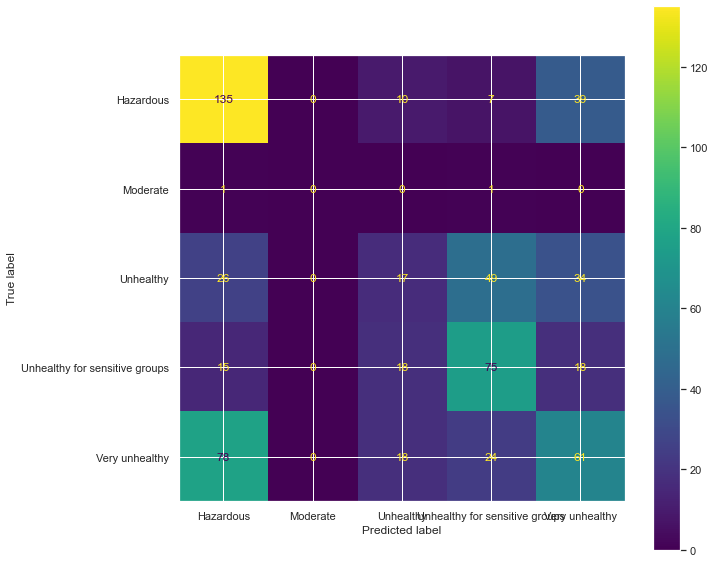

In [483]:
# визуализируем для наглядности

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

In [ ]:
# точность модели классификации  выше, чем в регресии, но всё равно довольно низкая.

In [ ]:
# попробуем оставить только параметры, отобранные по Лассо, f-regr

In [459]:
columns_class_lasso = df_lasso.columns.append(df.columns[-2:])
columns_class_lasso

Index(['maxtempC', 'mintempC', 'uvIndex', 'DewPointC', 'FeelsLikeC',
       'WindChillC', 'pressure', 'windspeedKmph', 'month', 'season'],
      dtype='object')

In [460]:
rfc_lasso = RandomForestClassifier()
rfc_lasso.fit(X_train, y_class_train)

RandomForestClassifier()

In [461]:
predictions_lasso = rfc_lasso.predict(X_test)

In [552]:
f1_score_rfc_lasso = f1_score(y_class_test, predictions_lasso, average='micro') 
print('точность - %0.2f' % f1_score_rfc_lasso)

точность - 0.47


In [463]:
columns_class_fstat = df_fstat.columns.append(df.columns[-2:])
columns_class_fstat

Index(['maxtempC', 'mintempC', 'uvIndex', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'visibility', 'winddirDegree', 'windspeedKmph', 'month',
       'season'],
      dtype='object')

In [464]:
rfc_fstat = RandomForestClassifier()
rfc_fstat.fit(X_train, y_class_train)

RandomForestClassifier()

In [465]:
predictions_fstat = rfc_fstat.predict(X_test)

In [553]:
f1_score_rfc_fstat = f1_score(y_class_test, predictions_fstat, average='micro') 
print('точность - %0.2f' % f1_score_rfc_fstat)

точность - 0.46


In [ ]:
# точность не возросла по сравнению с построением модели с учетом всех признаков

### 5.5 Модель классификации К-средних  <a id='part5.5'></a> 

In [ ]:
# для сравнения попробуем построить ещё одну модель классификации по методу К-средних

In [534]:
from sklearn.neighbors import KNeighborsClassifier

In [535]:
knn = KNeighborsClassifier()

In [547]:
knn.fit(X_train, y_class_train)

KNeighborsClassifier()

In [548]:
y_pred_k = knn.predict(X_test)

In [554]:
f1_score_knn= f1_score(y_class_test, y_pred_k, average='micro') 
print('точность - %0.2f' % f1_score_knn)

точность - 0.39


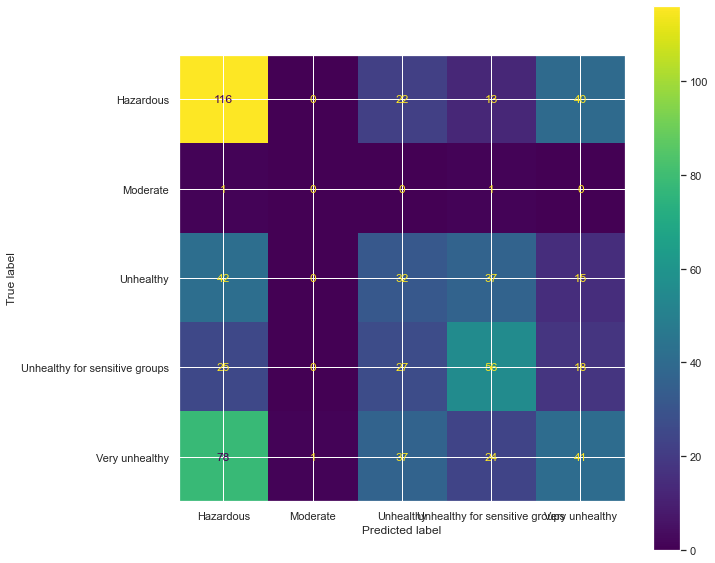

In [560]:
# матрица неточностей
cm_knn = confusion_matrix(y_class_test, y_pred_k) 
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot()

In [ ]:
# gridsearch выбор наилучших параметров

In [538]:
metrics = ['minkowski','euclidean','manhattan']
weights = ['uniform','distance']
numNeighbors = np.arange(5,11) # n_neighbors int, default=5
param_grid = dict(metric=metrics, weights=weights, n_neighbors=numNeighbors)

In [539]:
param_grid

{'metric': ['minkowski', 'euclidean', 'manhattan'],
 'weights': ['uniform', 'distance'],
 'n_neighbors': array([ 5,  6,  7,  8,  9, 10])}

In [540]:
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_class_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [561]:
print(knn_grid.best_params_)
print('точность для обучающей выборки- %0.2f' % rfc_grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}
точность для обучающей выборки- 0.47


In [ ]:
# посмотрим и визуализируем прогноз для тестовой выборки

In [542]:
y_pred_knn = knn_grid.predict(X_test)

In [555]:
f1_score_knn_grid = f1_score(y_class_test, y_pred_knn, average='micro') 
print('точность - %0.2f' % f1_score_knn_grid)

точность - 0.38


In [ ]:
# результаты не лучше, чем предыдущая модель , поэтому далее попробуем оптимизировать "случайный лес"

### 5.6 Настройка гиперпараметров для "Случайного леса"  <a id='part5.6'></a> 

In [ ]:
# попробуем улучшить модель случайного леса путем настройки гиперпараметров

In [467]:
model = rfc

In [468]:
parameters = {
    'n_estimators': [100, 150, 200, 300], 'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1,2,3,4], 'max_features': ['auto', 'sqrt', 'log2'],
}

In [469]:
rfc_grid = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', cv = 5)

In [471]:
rfc_grid.fit(X_train, y_class_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='accuracy')

In [ ]:
# лучшие параметры

In [557]:
print(rfc_grid.best_params_)
print('точность для обучающей выборки- %0.2f' % rfc_grid.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
точность для обучающей выборки- 0.47


In [ ]:
# посмотрим и визуализируем прогноз для тестовой выборки

In [489]:
y_pred_grid = rfc_grid.predict(X_test)

In [556]:
f1_score_rfc_grid = f1_score(y_class_test, y_pred_grid, average='micro') 
print('точность - %0.2f' % f1_score_rfc_grid)

точность - 0.46


In [ ]:
# точность на том же уровне, многие параметры оптимальными выбраны устанавливаемые в модели по умолчанию

In [528]:
results_grid = pd.DataFrame(zip(y_class_test, y_pred_grid, y_class_test == y_pred_grid), columns = ['y_test', 'y_pred', 'result'])
results_grid

,y_test,y_pred,result
0,Unhealthy for sensitive groups,Unhealthy for sensitive groups,True
1,Hazardous,Hazardous,True
2,Unhealthy,Unhealthy for sensitive groups,False
3,Very unhealthy,Unhealthy for sensitive groups,False
4,Very unhealthy,Very unhealthy,True
...,...,...,...
621,Very unhealthy,Hazardous,False
622,Hazardous,Unhealthy,False
623,Hazardous,Unhealthy for sensitive groups,False
624,Unhealthy,Unhealthy for sensitive groups,False


In [529]:
results_grid.result.value_counts()

False    338
True     288
Name: result, dtype: int64

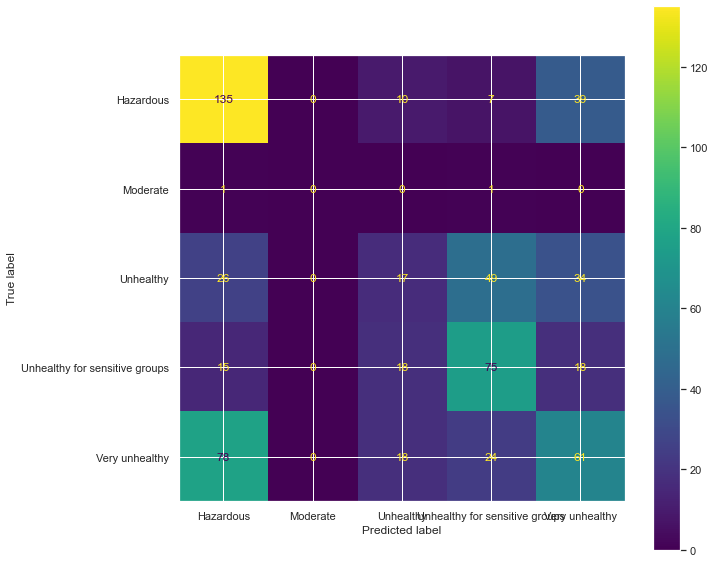

In [531]:
# матрица неточностей
cm_grid = confusion_matrix(y_class_test, y_pred_grid) 
disp_grid = ConfusionMatrixDisplay(confusion_matrix=cm_grid, display_labels=rfc_grid.classes_)
disp_grid.plot()

In [630]:
# df.iloc[:, -3].unique()

In [530]:
results_grid_score = pd.DataFrame(results_grid.y_test.value_counts()).reset_index().merge(
    pd.DataFrame(results_grid.y_pred.value_counts()).reset_index(), how = 'outer', on = 'index')
results_grid_score['accuracy pred, %'] = round(results_grid_score.y_pred/results_grid_score.y_test*100, 0)
results_grid_score

,index,y_test,y_pred,"accuracy pred, %"
0,Hazardous,191,255.0,134.0
1,Very unhealthy,181,152.0,84.0
2,Unhealthy,126,63.0,50.0
3,Unhealthy for sensitive groups,126,156.0,124.0
4,Moderate,2,NaN,NaN


<AxesSubplot:xlabel='y_pred', ylabel='Count'>

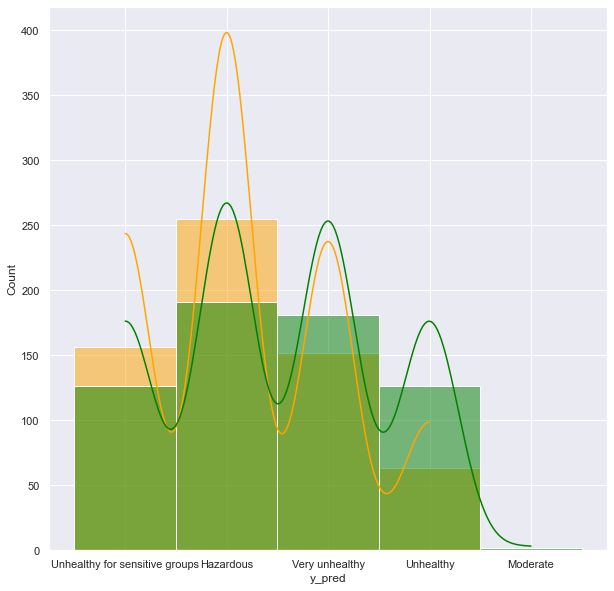

In [494]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(results_grid.y_pred, kde=True, color = 'orange')
sns.histplot(results_grid.y_test, kde=True, color = 'green')

In [532]:
# судя по визуализациям  модель по сравнению с тестовыми данными дает некий дисбаланс в категориях, 
# завышая прогноз по самой опасной Hazardous и менее опасной Unhealthy for sensitive groups (*Moderate не берем в расчет)
# по промежуточным же категориям результаты занижены

In [ ]:
# выведем результаты по всем моделям

In [550]:
pd.concat([score_comparison, pd.DataFrame([f1_score_rfc,f1_score_rfc_grid, f1_score_knn, f1_score_knn_grid],
                                          columns=["Scores"], index= ['RandomF_Class','RandomF_Class_GridSearch', 'KNeighborsClass', 'KNeighborsClass_GridSearch'], dtype=float)])


,Scores
Linear_Reg,0.299593
Linear_Reg_GridSearch,0.299593
Cross_Val,0.240420
RandomF_Reg,0.349556
RandomF_Reg_GridSearch,0.367400
RandomF_Class,0.469649
RandomF_Class_GridSearch,0.460064
KNeighborsClass,0.391374
KNeighborsClass_GridSearch,0.383387


In [546]:
# тем не менее модель классификации Случайный лес для классификации показала лучшие результаты 
# поэтому в дальнейшем есть смысл пытаться улучшать именно её